In [ ]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Encoder_df = LabelEncoder()

In [ ]:
from tensorflow.keras.layers import Dense,Input,LSTM,GlobalMaxPooling1D,Dropout, Flatten, Conv2D, BatchNormalization, MaxPooling2D, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget https://lazyprogrammer.me/course_files/exercises/AirlineSentimentTweets.csv

--2022-09-23 09:19:16--  https://lazyprogrammer.me/course_files/exercises/AirlineSentimentTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineSentimentTweets.csv’

AirlineSentimentTwe 100%[===================>]   3.26M  4.66MB/s    in 0.7s    

2022-09-23 09:19:17 (4.66 MB/s) - ‘AirlineSentimentTweets.csv’ saved [3421431/3421431]



In [ ]:
df = pd.read_csv('AirlineSentimentTweets.csv')

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
to_drop=['tweet_id','airline_sentiment_gold','negativereason_gold','tweet_coord']

In [ ]:
df.isnull().sum().sort_values(ascending=False)

negativereason_gold             14608
airline_sentiment_gold          14600
tweet_coord                     13621
negativereason                   5462
user_timezone                    4820
tweet_location                   4733
negativereason_confidence        4118
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_created                       0
dtype: int64

In [ ]:
pd.DataFrame(df.isnull().sum()/df.shape[0]).T

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,0.0,0.0,0.0,0.373087,0.281284,0.0,0.997268,0.0,0.997814,0.0,0.0,0.930396,0.0,0.323292,0.329235


In [ ]:
df.drop(columns=to_drop,inplace=True)

In [ ]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
mapper = {'neutral' : 0, 'positive' : 1 ,  'negative' : 2}

In [ ]:
df['target']=df['airline_sentiment'].map(mapper)

In [ ]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,target
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),1
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),2
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),2


In [ ]:
X,Y = np.array(df['text']), np.array(df['target'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
MAX_VOCAB_SIZE=20000

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE) # utile per evitare le parole rare o mispelling, et similia
tokenizer.fit_on_texts(x_train) # basta solo questa fit perché si suppone ci siano le stesse parole che nel test
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq=tokenizer.texts_to_sequences(x_test)

In [ ]:
tokenizer.word_index

{'to': 1,
 'the': 2,
 'i': 3,
 'a': 4,
 'united': 5,
 'you': 6,
 'for': 7,
 'flight': 8,
 'on': 9,
 'and': 10,
 'my': 11,
 'usairways': 12,
 'americanair': 13,
 'is': 14,
 'in': 15,
 'southwestair': 16,
 'jetblue': 17,
 'of': 18,
 'it': 19,
 'me': 20,
 'your': 21,
 'have': 22,
 'was': 23,
 'not': 24,
 'no': 25,
 'with': 26,
 'at': 27,
 'that': 28,
 'this': 29,
 'get': 30,
 'but': 31,
 't': 32,
 'co': 33,
 'from': 34,
 'be': 35,
 'http': 36,
 'can': 37,
 'are': 38,
 'cancelled': 39,
 'thanks': 40,
 'now': 41,
 'we': 42,
 'an': 43,
 'service': 44,
 'just': 45,
 'do': 46,
 'so': 47,
 'been': 48,
 '2': 49,
 'help': 50,
 'time': 51,
 'customer': 52,
 'will': 53,
 'up': 54,
 'out': 55,
 'our': 56,
 'they': 57,
 "i'm": 58,
 'us': 59,
 'what': 60,
 'hours': 61,
 'amp': 62,
 'flights': 63,
 'when': 64,
 'how': 65,
 'hold': 66,
 'plane': 67,
 'if': 68,
 'why': 69,
 'all': 70,
 'still': 71,
 'please': 72,
 'there': 73,
 'thank': 74,
 'would': 75,
 'one': 76,
 'need': 77,
 'delayed': 78,
 'had': 7

In [ ]:
V=len(tokenizer.word_index) # unique token
V

13842

In [ ]:
max = 0
for el in x_test_seq:
  if len(el)>max:
    max=len(el)
for el in x_train_seq:
  if len(el)>max:
    max=len(el)

print(max)



36


In [ ]:
T=max

In [ ]:
x_train_data = pad_sequences(x_train_seq,maxlen=T)
x_test_data=pad_sequences(x_test_seq,maxlen=T)

In [ ]:
x_train_data.shape

(11712, 36)

In [ ]:
D=20
M=15

In [ ]:
K=len(df['airline_sentiment'].unique())
K

3

In [ ]:
D=100

M=30

i = Input(shape=(T,))
x = Embedding(V+1,D)(i) # output TxD

x=Conv1D(1024, 3, padding='valid', activation='relu', strides=1)(x) # output T' x M
x=GlobalMaxPooling1D()(x)


x = Dropout(0.5)(x)

x = BatchNormalization()(x)

x = Dropout(0.5)(x)

x = Dense(2048,activation='relu')(x)


x = Dropout(0.5)(x)

x = BatchNormalization()(x)

x = Dropout(0.5)(x)


x=Dense(K,activation='softmax')(x)

model=Model(i,x)

model.compile(
    optimizer = tf.optimizers.Adam(lr=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

r = model.fit(x_train_data,y_train,
              validation_data=(x_test_data,y_test),
              epochs=10,
              batch_size=128
              )

Epoch 1/10
92/92 [==============================] - 2s 13ms/step - loss: 1.3801 - accuracy: 0.5393 - val_loss: 0.9504 - val_accuracy: 0.6240
Epoch 2/10
92/92 [==============================] - 1s 11ms/step - loss: 0.8196 - accuracy: 0.6953 - val_loss: 0.8655 - val_accuracy: 0.6240
Epoch 3/10
92/92 [==============================] - 1s 11ms/step - loss: 0.5815 - accuracy: 0.7752 - val_loss: 0.7790 - val_accuracy: 0.6400
Epoch 4/10
92/92 [==============================] - 1s 10ms/step - loss: 0.4339 - accuracy: 0.8350 - val_loss: 0.7074 - val_accuracy: 0.7039
Epoch 5/10
92/92 [==============================] - 1s 11ms/step - loss: 0.3314 - accuracy: 0.8781 - val_loss: 0.6271 - val_accuracy: 0.7435
Epoch 6/10
92/92 [==============================] - 1s 10ms/step - loss: 0.2428 - accuracy: 0.9113 - val_loss: 0.5814 - val_accuracy: 0.7725
Epoch 7/10
92/92 [==============================] - 1s 10ms/step - loss: 0.1933 - accuracy: 0.9285 - val_loss: 0.6284 - val_accuracy: 0.7910
Epoch 8/10
92

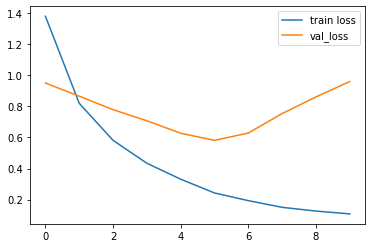

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

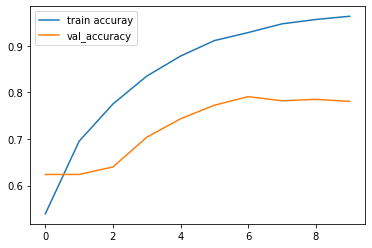

In [ ]:
plt.plot(r.history['accuracy'],label='train accuray')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Versione con LSTM

In [64]:
D=100

M=256



i = Input(shape=(T,))
x=Embedding(V+1,D)(i) # mettiamo +1 poiché partiamo da 1, non da 0, quindi ce ne serve uno in più, in quanto 
                    # gli array su python iniziano da 0
x=LSTM(M)(x)


x = Dropout(0.2)(x)

x = Dense(256,activation='relu')(x)

x = Dropout(0.2)(x)

x=Dense(K,activation='softmax')(x)

model = Model(i,x)

model.compile(
    optimizer = tf.optimizers.Adam(lr=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

r = model.fit(x_train_data,y_train,
              validation_data=(x_test_data,y_test),
              epochs=10
              )

Epoch 1/10
366/366 [==============================] - 38s 8ms/step - loss: 0.6496 - accuracy: 0.7308 - val_loss: 0.5307 - val_accuracy: 0.7964
Epoch 2/10
366/366 [==============================] - 3s 7ms/step - loss: 0.3800 - accuracy: 0.8540 - val_loss: 0.5169 - val_accuracy: 0.7923
Epoch 3/10
366/366 [==============================] - 3s 7ms/step - loss: 0.2301 - accuracy: 0.9178 - val_loss: 0.6338 - val_accuracy: 0.7831
Epoch 4/10
366/366 [==============================] - 3s 8ms/step - loss: 0.1426 - accuracy: 0.9494 - val_loss: 0.6936 - val_accuracy: 0.7599
Epoch 5/10
366/366 [==============================] - 3s 7ms/step - loss: 0.0976 - accuracy: 0.9662 - val_loss: 0.9159 - val_accuracy: 0.7527
Epoch 6/10
366/366 [==============================] - 3s 7ms/step - loss: 0.0713 - accuracy: 0.9766 - val_loss: 0.9652 - val_accuracy: 0.7579
Epoch 7/10
366/366 [==============================] - 2s 7ms/step - loss: 0.0523 - accuracy: 0.9828 - val_loss: 1.0585 - val_accuracy: 0.7684
Epoch

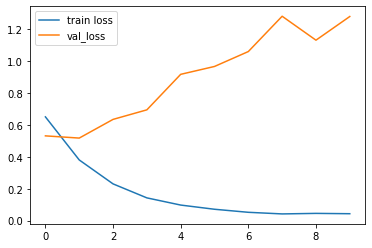

In [65]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

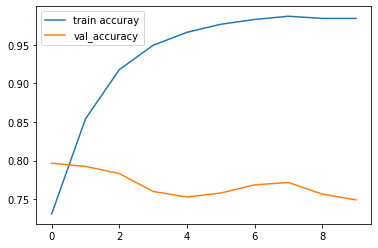

In [66]:
plt.plot(r.history['accuracy'],label='train accuray')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()